In [1]:
from ultralytics import YOLO
import time

In [2]:

# Load a pretrained YOLO11n model
model = YOLO("/home/lql/lql_ws/src/reco/scripts/yolo11n.pt")



In [3]:
source = "../test_img/test1.png"
results = model(source)  # list of Results objects

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:128: UserWarning: CUDA initialization: The NVIDIA driver on your system is too old (found version 11080). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver. (Triggered internally at ../c10/cuda/CUDAFunctions.cpp:108.)
  return torch._C._cuda_getDeviceCount() > 0


image 1/1 /home/lql/lql_ws/src/reco/scripts/../test_img/test1.png: 416x640 2 cups, 1 cell phone, 49.6ms
Speed: 11.5ms preprocess, 49.6ms inference, 1.0ms postprocess per image at shape (1, 3, 416, 640)


In [4]:
#if the class is cup or bottle, then print the image cordinate of the center of the bounding box. If no cup or bottle is detected, print "No cup or bottle detected"
detected = False
for box in results[0].boxes:
    class_name = results[0].names[int(box.cls)]
    if class_name == "cup" or class_name == "bottle":
        x_center = (box.xyxy[0][0] + box.xyxy[0][2]) / 2
        y_center = (box.xyxy[0][1] + box.xyxy[0][3]) / 2
        print("Image coordinate of the center of the bounding box: ", x_center, y_center)
        #judge if the object is mainly red
        image = results[0].orig_img
        # Extract the region of interest (ROI) from the image
        x1, y1, x2, y2 = map(int, box.xyxy[0])
        roi = image[y1:y2, x1:x2]

        # Calculate the mean color of the ROI
        mean_color = roi.mean(axis=(0, 1))
        print("Mean color of the ROI: ", mean_color)

        # Check if the object is mainly red (BGR format)
        if mean_color[2] > mean_color[1] and mean_color[2] > mean_color[0]:
            print("The object is mainly red")
        else:
            print("The object is not mainly red")

        
        detected = True
        #break
if not detected:
    print("No cup or bottle detected")


Image coordinate of the center of the bounding box:  tensor(357.5742) tensor(224.9147)
Mean color of the ROI:  [     80.947      81.811      151.42]
The object is mainly red
Image coordinate of the center of the bounding box:  tensor(129.7377) tensor(140.0680)
Mean color of the ROI:  [     86.497      94.186      101.68]
The object is mainly red


In [5]:
print(results[0].boxes[0].xyxy)

tensor([[288.8568,  68.7522, 426.2917, 381.0772]])


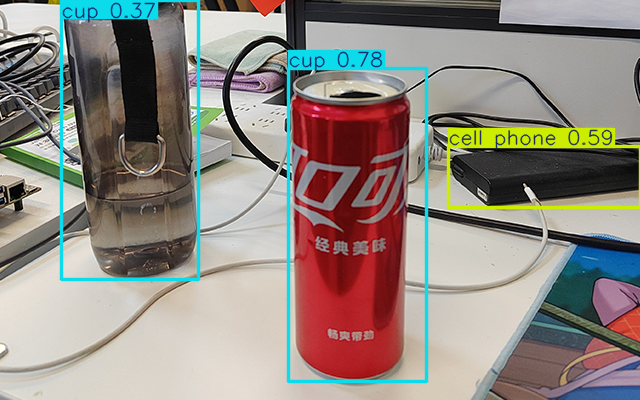

In [7]:
results[0].show()  # display on screen  